In [1]:
# Pandas is the library for Data Manipulation in Python
import pandas as pd

# Numpy is the library used for Numerical Operations in Python 
import numpy as np

# Matplotlib is the library used for Data Visualization in Python
import matplotlib.pyplot as plt

# ScikitLearn is the library used for implementing solving Machine Learning problems in Python
from sklearn import svm

# Here we read dataset in variable df, which is actually a DataFrame. A DataFrame is a special datatype used
# in Pandas which can hold as many rows and columns - You can think it as an excel sheet in your environment
df = pd.read_csv("dataset.csv")

# .head() function prints first 5 rows of a DataFrame
df.head()

,years,yield,produtn,area,rainfall,temp,water availabilty,pesticide,fertilizer,wind,soil ph,humdity
0,1997,2054,401.60,195.5,629,23.95,196,300,45,984.1,7.67,18.9
1,1998,2188,390.70,178.5,411,25.25,179,569,48,983.2,7.87,18.8
2,1999,2096,365.68,174.4,373,25.95,175,362,51,982.1,7.55,18.3
3,2000,2529,477.10,188.6,451,25.70,188,380,60,981.8,7.90,18.1
4,2001,2492,476.10,191.0,612,25.55,191,302,65,982.6,7.90,19.2


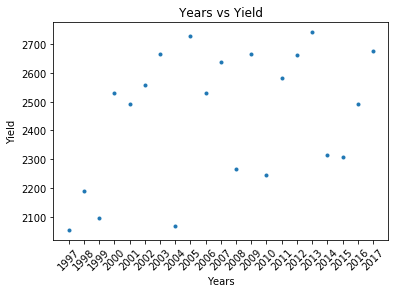

In [2]:
# Graphical Representation of our data in from of a scatter plot - Years vs Yield
# Here we plot 2 columns i.e 'years' and 'yield' as a function of each other
plt.scatter(df['years'],df['yield'],marker='.')
plt.xticks(df['years'],rotation=(45))
plt.xlabel('Years')
plt.ylabel('Yield')
plt.title('Years vs Yield')
plt.show()

In [3]:
# We extract Yield column of our DataFrame in a variable yield_of_crop
yield_of_crop = df['yield']
yield_of_crop.head()

# We select all the columns of except Yield column in a variable features
features = df.drop(['yield'],axis=1)
features.head()
 
#Overview of Dataset
print("\nPrediction of Yield dataset has {} data points with {} variables each.".format(*df.shape))


Prediction of Yield dataset has 21 data points with 12 variables each.


In [4]:
# Statistical Overview of Dataset

# Minimum Yield
minimum_yield = np.min(yield_of_crop)
print("Statistical Overview of Dataset:\n")
print("Minimum Yield: ",minimum_yield)

# Maximum Yield
maximum_yield = np.max(yield_of_crop)
print("Maximum Yield: ",maximum_yield)

# Mean of Yield
mean_yield = np.mean(yield_of_crop)
print("Mean of Yield: ",mean_yield)

# Median of Yield
median_yield = np.median(yield_of_crop)
print("Median of Yield: ",median_yield)

# Standard Deviation of Yield
std_yield = np.std(yield_of_crop)
print("Standard Deviation of Yield: ",std_yield)

# Correlation between Years and Yield


Statistical Overview of Dataset:

Minimum Yield:  2054
Maximum Yield:  2742
Mean of Yield:  2452.2380952380954
Median of Yield:  2529.0
Standard Deviation of Yield:  223.00606542293752


In [5]:
# Calculating Correlation between all variables in the form of a table
df.drop(['years'],axis=1).corr(method='pearson')

,yield,produtn,area,rainfall,temp,water availabilty,pesticide,fertilizer,wind,soil ph,humdity
yield,1.000000,0.787582,0.273929,0.009418,-0.100551,0.308818,0.272245,0.347445,-0.010697,0.087806,-0.020352
produtn,0.787582,1.000000,0.750546,0.102176,-0.203994,0.749802,0.592859,0.487159,0.205004,0.109671,0.107346
area,0.273929,0.750546,1.000000,0.271929,-0.315268,0.960423,0.783492,0.443364,0.420075,-0.093795,0.243162
rainfall,0.009418,0.102176,0.271929,1.000000,-0.218243,0.314175,0.207609,0.320518,0.309611,-0.064748,0.375312
temp,-0.100551,-0.203994,-0.315268,-0.218243,1.000000,-0.179481,0.036661,0.078534,-0.268044,-0.076314,-0.326605
water availabilty,0.308818,0.749802,0.960423,0.314175,-0.179481,1.000000,0.836512,0.464756,0.552367,-0.119518,0.217437
pesticide,0.272245,0.592859,0.783492,0.207609,0.036661,0.836512,1.000000,0.251711,0.405265,-0.257413,0.287989
fertilizer,0.347445,0.487159,0.443364,0.320518,0.078534,0.464756,0.251711,1.000000,-0.131784,0.133600,-0.066166
wind,-0.010697,0.205004,0.420075,0.309611,-0.268044,0.552367,0.405265,-0.131784,1.000000,-0.139754,0.125933
soil ph,0.087806,0.109671,-0.093795,-0.064748,-0.076314,-0.119518,-0.257413,0.133600,-0.139754,1.000000,-0.143297


In [6]:
from sklearn.model_selection import train_test_split


# Splitting Dataset into training and testing sets. This is important because with this we can train our Algorithm
# on a part of our dataset known as training set and then test on another part known as training test. In this way,
# we know that our Algorithm is working as expected or not

X_train , X_test, y_train, y_test = train_test_split(features, yield_of_crop,test_size=0.1,random_state=42)

print("Training and Testing was successful")

Training and Testing was successful


In [7]:
from sklearn.metrics import r2_score

# It is difficult to measure the quality of a given model without quantifying its performance over training and testing.
# This is typically done using some type of performance metric, whether it is through calculating some type of error, 
# the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of 
# determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic
# in regression analysis, as it often describes how "good" that model is at making predictions.


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score


In [8]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


In [9]:
# We import MultiLayer Perceptron Regressor which is a neural network from ScikitLearn Library
from sklearn.neural_network import MLPRegressor

# Standardization of a dataset is a common requirement for many machine learning estimators: they might behave 
# badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian
# with 0 mean and unit variance). So, we import StandardScaler for this from ScikitLearn Library

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# We initialize our first model using Artificial Neural Network(ANN)
model1 = MLPRegressor(activation='logistic',solver='lbfgs',alpha=1,hidden_layer_sizes=(11,2),random_state=None,max_iter=10000)

# Fitting the model on training set of Dataset
model1.fit(X_train,y_train)

# Prediction of yield on our testing set
y_predict1 = model1.predict(X_test)
print(y_predict1)

# Calculating performance score - It tells us how our model behaves on testing data  
score1 = model1.score(X_test,y_predict1)
print("The training score is: ",score1)

# This is our data in an array, which hold different parameters, we want to get prediction of yield for this data
given_data1 = [[2019,403.6,195.5,629,43.95,186,300,45,976,7.67,18.9]];

# We get prediction for our data using ANN based model
prediction1 = model1.predict(given_data1)
print("The predicted yields for given data using Artificial Neural Network(ANN) is: ", prediction1)

[2470.38889496 2470.38889496 2470.38889496]
The training score is:  1.0
The predicted yields for given data using Artificial Neural Network(ANN) is:  [2470.38889496]


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Calculating MAE,MSE and RMSE for testing set and predicted values of testing set
print('Mean Absolute Error for Artificial Neural Network(ANN) :',mean_absolute_error(y_test,y_predict1))
print('Mean Square Error for Artificial Neural Network(ANN) :',mean_squared_error(y_test, y_predict1))
rmse_test1 = sqrt(mean_squared_error(y_test, y_predict1))
print('Root Mean Square Error for Artificial Neural Network(ANN) :',rmse_test1)
print('R^2 for Artificial Neural Network(ANN) : ',performance_metric(y_test,y_predict1))

Mean Absolute Error for Artificial Neural Network(ANN) : 254.12963165203487
Mean Square Error for Artificial Neural Network(ANN) : 77952.67129483339
Root Mean Square Error for Artificial Neural Network(ANN) : 279.20005604375046
R^2 for Artificial Neural Network(ANN) :  -0.2611750819785157


In [11]:
# Importing Support Vector Machines (SVM) Algorithm from ScikitLearn library
from sklearn import svm

# Here we initialize second model using SVM
model2 = svm.SVR(C=2390.0, cache_size=500, coef0=200, degree=3, epsilon=0.011299, gamma=0.03129015,
    kernel='rbf', max_iter=10000, shrinking=True, tol=0.00001, verbose=True)


# Fitting the model on training set of dataset
model2.fit(X_train,y_train)

# Prediction of yield on our testing set
y_predict2 = model2.predict(X_test)
print(y_predict2)

# Calculating performance score - It tells us how our model behaves on testing data  
score2 = model2.score(X_test,y_predict2)
print("The training score is: ",score2)

# This is our data in an array, which hold different parameters, we want to get prediction of yield for this data
given_data2 = [[2019,403.6,195.5,629,43.95,186,300,45,976,7.67,18.9]]

# We get prediction for our data using SVM based model
prediction2 = model2.predict(given_data2)

print("The predicted yield for given data using Support Vector Machines(SVM) Algorithm is: ", prediction2)

[LibSVM][2241.37831023 2333.41853037 2638.19221303]
The training score is:  1.0
The predicted yield for given data using Support Vector Machines(SVM) Algorithm is:  [2589.13031644]


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Calculating MAE,MSE and RMSE for testing set and predicted values of testing set
print('Mean Absolute Error for Support Vector Machines(SVM) : ',mean_absolute_error(y_test,y_predict2))
print('Mean Square Error for Support Vector Machines(SVM) : ',mean_squared_error(y_test, y_predict2))
rmse_test2 = sqrt(mean_squared_error(y_test, y_predict2))
print('Root Mean Square Error for Support Vector Machines(SVM) : ',rmse_test2)
print('R^2 for Support Vector Machines(SVM) : ',performance_metric(y_test,y_predict2))

Mean Absolute Error for Support Vector Machines(SVM) :  76.20154252494558
Mean Square Error for Support Vector Machines(SVM) :  11990.022851207274
Root Mean Square Error for Support Vector Machines(SVM) :  109.49896278598841
R^2 for Support Vector Machines(SVM) :  0.8060166790807868


In [13]:
# We import LinearRegression from ScikitLearn library
from sklearn.linear_model import LinearRegression

# Here we initialize third model using LR
model3 = LinearRegression()

# Fitting the model on training set of dataset
model3.fit(X_train,y_train)

# Prediction of yield on our testing set
y_predict3 = model3.predict(X_test)
print(y_predict3)

# Calculating performance score - It tells us how our model behaves on testing data  
score3 = model3.score(X_test,y_predict3)
print("The training score is: ",score3)

# This is our data in an array, which hold different parameters, we want to get prediction of yield for this data
given_data3 = [[2019,403.6,195.5,629,43.95,186,300,45,976,7.67,18.9]]

# We get prediction for our data using SVM based model
prediction3 = model2.predict(given_data2)

print("The predicted yield for given data using Linear Regression (LR) Algorithm is: ", prediction3)



[2140.07398522 2225.25425821 2698.15339293]
The training score is:  1.0
The predicted yield for given data using Linear Regression (LR) Algorithm is:  [2589.13031644]


In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

# Calculating MAE,MSE and RMSE for testing set and predicted values of testing set
print('Mean Absolute Error for Linear Regression (LR) : ',mean_absolute_error(y_test,y_predict3))
print('Mean Square Error for Linear Regression (LR)  : ',mean_squared_error(y_test, y_predict3))
rmse_test3 = sqrt(mean_squared_error(y_test, y_predict3))
print('Root Mean Square Error for Linear Regression (LR) : ',rmse_test3)
print('R^2 for Linear Regression (LR) : ',performance_metric(y_test,y_predict3))

Mean Absolute Error for Linear Regression (LR) :  70.99103998009407
Mean Square Error for Linear Regression (LR)  :  5614.467902376735
Root Mean Square Error for Linear Regression (LR) :  74.92975311834903
R^2 for Linear Regression (LR) :  0.909165049774054


In [15]:
# Whenever we use two approches simultaneously for Regression, as we used ANN, SVM and then LR here, we are required
# to do ensembling on them. In Regression based on Ensembling, we average outputs from ANN, SVM and LR respectively, and then
# we get final prediction. We use ensembling technique because it allows us to remove the trade-offs of all our three
# approches and also, by using it, we ensure that our final prediction is not biased in any way.

# Averaging both outputs
added_prediction_yield = prediction1 + prediction2 + prediction3
final_prediction_yield = added_prediction_yield/3


print("The predicted yield for given data using ANN, SVM and LR is: ", final_prediction_yield)

The predicted yield for given data using ANN, SVM and LR is:  [2549.54984261]
